In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add h4d proj root to sys.path so we can import stuff that's in h4d_main/h4d:
# Example: suppose you want to import something from <h4d_main>/h4d/h4d/submodule/:
# "import h4d.submodule" or "from h4d.submodule import foo"
import sys, subprocess
sys.path.append(subprocess.check_output(['git','rev-parse','--show-toplevel']).strip().decode("utf-8"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Imports

In [11]:
from collections import Counter
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
from h4dlib.config import h4dconfig
from pathlib import Path

pylab.rcParams['figure.figsize'] = (8.0, 10.0)


## Configure which dataset to load:

In [9]:
dataDir = h4dconfig.DATA_DIR / 'Xview/coco_chipped'
dataType = ''
annFile = dataDir / "xview_coco_v2_train_chipped.json"

print("xviewcoco_dir: ", dataDir)
print("annFile: ", annFile)



xviewcoco_dir:  /home/gbiamby/proj/h4d_main/h4d/datasets/Xview/coco_chipped
annFile:  /home/gbiamby/proj/h4d_main/h4d/datasets/Xview/coco_chipped/xview_coco_v2_train_chipped.json


## Load dataset

In [10]:
# initialize COCO api for instance annotations
coco=COCO(annFile)



loading annotations into memory...
Done (t=2.69s)
creating index...
index created!


## Output some dataset stats:

In [24]:
imgs = coco.dataset["images"]
anns = coco.dataset["annotations"]
imgs_with_anns = set()


print("Total images: ", len(imgs))
print("Total images with annotations: ", len(coco.imgToAnns.keys()))
print("Total annotations: ", len(anns))
print("Average annotations per image (ignoring images w/o any anns): ", np.average([len(anns) for image_id, anns in coco.imgToAnns.items()]))



Total images:  19631
Total images with annotations:  10557
Total annotations:  418217
Average annotations per image (ignoring images w/o any anns):  39.61513687600644


In [77]:
areas = [ann["bbox"][2] * ann["bbox"][3] for ann in anns]
print(f"min area: {np.min(areas)}, max area: {np.max(areas)}, avg. area: {np.average(areas)}")


min area: 0, max area: 237133, avg. area: 1893.3259217104996


## Plot Histogram of bbox areas (pixels^2):



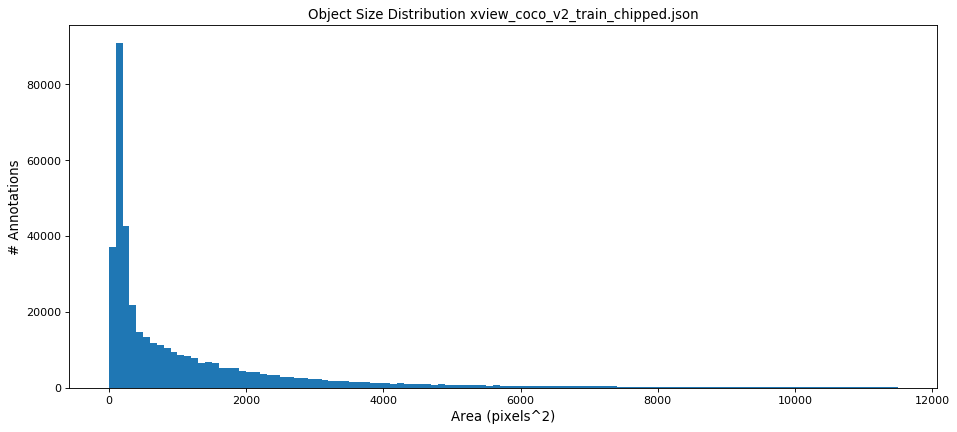

In [78]:
# Configure histogram bins: 
step_size = 100
bins = list(range(0, int(np.percentile(areas, 97.5)) + step_size, step_size))

# Plot: 
fig_size, dpi, rotation = (14, 6), 80, 90
plt.figure(num=None, figsize=fig_size, dpi=dpi, facecolor='w', edgecolor='k')
plt.hist(areas, bins=bins)
plt.title("Object Size Distribution " + annFile.name)
plt.xlabel('Area (pixels^2)', fontsize=12)
plt.ylabel('# Annotations', fontsize=12)
plt.show()

## Calculate new pixels^2 cutoffs

In [79]:
print("Total annotations: ", len(areas))
area_percentiles = np.percentile(a=areas, q=[33.33333, 66.66667])
print("area percentiles: ", area_percentiles)
print(f"Using these cutoffs ({area_percentiles}) we get this many annotations in each group:")
print("Small:  ", len([a for a in areas if 0.0 <= a <= area_percentiles[0]]))
print("Medium: ", len([a for a in areas if area_percentiles[0] < a <= area_percentiles[1]]))
print("Large:  ", len([a for a in areas if area_percentiles[1] < a ]))


Total annotations:  418217
area percentiles:  [ 220. 1176.]
Using these cutoffs ([ 220. 1176.]) we get this many annotations in each group:
Small:   139473
Medium:  139591
Large:   139153
